In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [169]:
df = pd.read_csv(r'../../FEVS2021_PRDF_CSV/2021_OPM_FEVS_PRDF.csv')
## Checking if there is any duplicate values
df

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292515,154057939422,ST,3.0,4.0,4.0,3.0,4,4,2,4,...,B,B,B,A,A,A,B,B,A,3.004992
292516,151758964104,ST,3.0,4.0,2.0,4.0,2,2,3,3,...,B,B,B,A,A,A,B,B,D,4.427855
292517,143492802997,ST,3.0,3.0,NaN,4.0,4,4,4,3,...,NaN,NaN,NaN,NaN,NaN,A,A,NaN,A,4.202227
292518,110267537558,ST,2.0,4.0,5.0,5.0,2,1,5,4,...,B,B,B,A,A,A,B,B,C,3.523113


In [170]:
df.drop_duplicates() ##dropping all the duplicate values
print()
print(df.info())  ##checking the data types of every column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        290770 non-null  object 
 7   Q6        286449 non-null  object 
 8   Q7        290240 non-null  object 
 9   Q8        291451 non-null  object 
 10  Q9        291910 non-null  float64
 11  Q10       292038 non-null  object 
 12  Q11       292018 non-null  object 
 13  Q12       291755 non-null  object 
 14  Q13       291920 non-null  object 
 15  Q14       291306 non-null  object 
 16  Q15       288257 non-null  object 
 17  Q16       290367 non-null  object 
 18  Q17       290268 non-null  object 
 19  Q18       291274 non-null  object 
 20  Q19

In [171]:
df.Q11.value_counts()

2    98762
X    72324
5    53853
1    41320
3    19878
4     5881
Name: Q11, dtype: int64

In [172]:
df.head()

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842


In [173]:
df['Q1'].describe()

count    291074.000000
mean          3.843239
std           1.086775
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Q1, dtype: float64

### Data Cleaning

In [174]:
## There are certain variables which should be nature but they are not because some of the entries have string value.
df_c  = df.copy()
objects= [column for column, is_type in (df_c.dtypes=="object").items() if is_type] ## Extracting out all the value which should be integar but is not
## The column 'agency' holds no significance here so it is to be dropped.
objects.remove('agency')
for i in objects:
    df_c[i] = df_c[i].replace(['X'], np.nan)
    df_c[i] = df_c[i].replace(np.nan, 0)
df_c.isnull().sum().sum()

276131

In [175]:
objects[:-9]
for i in objects[:-9]:
    df_c[i] = df_c[i].astype(float)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        292520 non-null  float64
 7   Q6        292520 non-null  float64
 8   Q7        292520 non-null  float64
 9   Q8        292520 non-null  float64
 10  Q9        291910 non-null  float64
 11  Q10       292520 non-null  float64
 12  Q11       292520 non-null  float64
 13  Q12       292520 non-null  float64
 14  Q13       292520 non-null  float64
 15  Q14       292520 non-null  float64
 16  Q15       292520 non-null  float64
 17  Q16       292520 non-null  float64
 18  Q17       292520 non-null  float64
 19  Q18       292520 non-null  float64
 20  Q19 

In [181]:
df_c = df_c.dropna()
df_c.isnull().sum().sum() ##-> No missing values found in the dataset

0

In [182]:
print('The number of survey entries altered:',df.shape[0]-df_c.shape[0]) 
print('The percentage of alterations from the original dataset is: ',round(((df.shape[0]-df_c.shape[0])/(df.shape[0])),2)*100,'%')


The number of survey entries altered: 54401
The percentage of alterations from the original dataset is:  19.0 %


In [13]:
df_ca = df_c.copy()
for i in df_ca.columns.values:
        df_ca[i] = df_ca[i].replace(0,df_ca[i].value_counts().idxmax())
df_ca

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,...,A,B,B,B,B,A,A,A,A,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,...,B,B,B,B,B,B,A,A,A,1.735842
5,195312241136,XX,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,...,A,B,B,B,A,B,B,A,A,2.076046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292514,117508083776,ST,3.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,...,B,B,B,A,A,A,A,B,A,3.487832
292515,154057939422,ST,3.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,...,B,B,B,A,A,A,B,B,A,3.004992
292516,151758964104,ST,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,...,B,B,B,A,A,A,B,B,D,4.427855
292518,110267537558,ST,2.0,4.0,5.0,5.0,2.0,1.0,5.0,4.0,...,B,B,B,A,A,A,B,B,C,3.523113


In [183]:
df_ca = df_c.copy()

In [184]:
df_ca.columns.values

array(['RandomID', 'agency', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
       'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17',
       'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35',
       'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44',
       'Q45', 'Q46', 'Q47_01', 'Q47_02', 'Q47_03', 'Q47_04', 'Q47_05',
       'Q47_06', 'Q47_07', 'Q47_08', 'Q47_09', 'Q47_10', 'Q47_11', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57',
       'DRNO', 'DHISP', 'DDIS', 'DAGEGRP', 'DSUPER', 'DFEDTEN', 'DSEX',
       'DMIL', 'DLEAVING', 'POSTWT'], dtype=object)

In [185]:
df_ca['Q2'].value_counts().idxmax()

4.0

In [192]:
df_ca.min()

RandomID    100000223611
agency                AF
Q1                   1.0
Q2                   1.0
Q3                   1.0
                ...     
Q54                  1.0
Q55                  0.0
Q56                  0.0
Q57                  0.0
POSTWT          0.786945
Length: 70, dtype: object

In [193]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238119 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  238119 non-null  int64  
 1   agency    238119 non-null  object 
 2   Q1        238119 non-null  float64
 3   Q2        238119 non-null  float64
 4   Q3        238119 non-null  float64
 5   Q4        238119 non-null  float64
 6   Q5        238119 non-null  float64
 7   Q6        238119 non-null  float64
 8   Q7        238119 non-null  float64
 9   Q8        238119 non-null  float64
 10  Q9        238119 non-null  float64
 11  Q10       238119 non-null  float64
 12  Q11       238119 non-null  float64
 13  Q12       238119 non-null  float64
 14  Q13       238119 non-null  float64
 15  Q14       238119 non-null  float64
 16  Q15       238119 non-null  float64
 17  Q16       238119 non-null  float64
 18  Q17       238119 non-null  float64
 19  Q18       238119 non-null  float64
 20  Q19 

In [194]:
df_num = df_ca.iloc[:, 2:69].copy()

In [195]:
pear_cor = df_num.corr(method='pearson')


In [196]:
pear_cor

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
Q1,1.000000,0.757186,0.660019,0.570816,0.382038,0.650862,0.501735,0.490847,0.462433,0.247314,...,0.448474,0.431594,0.369241,0.463828,0.443818,0.459943,0.072270,0.367733,0.376243,0.441641
Q2,0.757186,1.000000,0.665843,0.583811,0.356739,0.646162,0.505845,0.513403,0.470636,0.261297,...,0.450214,0.433817,0.375840,0.470635,0.451172,0.477108,0.078436,0.371249,0.381679,0.449964
Q3,0.660019,0.665843,1.000000,0.610775,0.336680,0.629295,0.556222,0.437160,0.430758,0.228020,...,0.406177,0.391926,0.338700,0.405315,0.391175,0.402444,0.052284,0.334699,0.342238,0.413499
Q4,0.570816,0.583811,0.610775,1.000000,0.373125,0.549534,0.560395,0.435049,0.435259,0.223711,...,0.362658,0.353496,0.320626,0.397868,0.383089,0.398036,0.019830,0.308331,0.306476,0.374057
Q5,0.382038,0.356739,0.336680,0.373125,1.000000,0.392827,0.304206,0.297220,0.292024,0.140180,...,0.266041,0.257513,0.249816,0.257386,0.249709,0.253454,0.003161,0.227097,0.234833,0.276053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q53,0.459943,0.477108,0.402444,0.398036,0.253454,0.404079,0.342661,0.422366,0.424441,0.219146,...,0.493971,0.483725,0.400881,0.817566,0.816822,1.000000,0.065172,0.359670,0.397792,0.446386
Q54,0.072270,0.078436,0.052284,0.019830,0.003161,0.043885,0.055249,0.038470,0.069687,-0.017329,...,0.097561,0.089568,0.048370,0.075599,0.069781,0.065172,1.000000,0.097797,0.058231,0.102848
Q55,0.367733,0.371249,0.334699,0.308331,0.227097,0.314966,0.310890,0.303467,0.280710,0.183887,...,0.500190,0.491256,0.624644,0.356926,0.346825,0.359670,0.097797,1.000000,0.673757,0.608960
Q56,0.376243,0.381679,0.342238,0.306476,0.234833,0.327768,0.305809,0.346377,0.275430,0.220203,...,0.567866,0.559303,0.584932,0.396872,0.396068,0.397792,0.058231,0.673757,1.000000,0.663559


In [62]:
ken_cor = df_num.corr(method='kendall')


In [63]:
ken_cor

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
Q1,1.000000,0.692293,0.595676,0.524766,0.351056,0.607446,0.495289,0.459607,0.401945,0.347412,...,0.411143,0.406026,0.344097,0.429011,0.423629,0.431469,0.064179,0.356151,0.387207,0.415943
Q2,0.692293,1.000000,0.602614,0.532444,0.323048,0.602155,0.494229,0.472876,0.405157,0.349662,...,0.406454,0.402410,0.342576,0.432212,0.427122,0.441886,0.069137,0.350298,0.381839,0.414960
Q3,0.595676,0.602614,1.000000,0.578283,0.307189,0.601493,0.551294,0.407312,0.377388,0.302036,...,0.373354,0.370111,0.317094,0.381516,0.378029,0.382113,0.041511,0.326505,0.353023,0.387385
Q4,0.524766,0.532444,0.578283,1.000000,0.348849,0.534855,0.564873,0.420292,0.387645,0.302484,...,0.354695,0.354203,0.322171,0.386363,0.384660,0.389996,0.015907,0.325264,0.338463,0.371092
Q5,0.351056,0.323048,0.307189,0.348849,1.000000,0.372770,0.303965,0.288939,0.262126,0.241063,...,0.258737,0.256046,0.250777,0.250462,0.250523,0.251677,0.001997,0.242272,0.255265,0.273866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q53,0.431469,0.441886,0.382113,0.389996,0.251677,0.393765,0.373702,0.419659,0.415772,0.330710,...,0.521779,0.519489,0.409454,0.855484,0.864310,1.000000,0.087914,0.388328,0.454119,0.469396
Q54,0.064179,0.069137,0.041511,0.015907,0.001997,0.037041,0.048305,0.053972,0.066080,0.073056,...,0.106995,0.103516,0.026668,0.092691,0.093730,0.087914,1.000000,0.047734,0.062568,0.100447
Q55,0.356151,0.350298,0.326505,0.325264,0.242272,0.327683,0.337923,0.309767,0.277630,0.272308,...,0.500531,0.500532,0.615008,0.382788,0.383046,0.388328,0.047734,1.000000,0.639468,0.611679
Q56,0.387207,0.381839,0.353023,0.338463,0.255265,0.355346,0.356545,0.365699,0.298367,0.291102,...,0.617530,0.618313,0.565026,0.456182,0.459224,0.454119,0.062568,0.639468,1.000000,0.722960


In [197]:
spear_cor = df_num.corr(method='spearman')


In [198]:
spear_cor

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
Q1,1.000000,0.752209,0.653506,0.575270,0.404852,0.663659,0.541118,0.523067,0.444680,0.281142,...,0.482057,0.475214,0.411901,0.482031,0.477225,0.486866,0.071507,0.410406,0.433293,0.472130
Q2,0.752209,1.000000,0.663924,0.586770,0.376109,0.661712,0.543254,0.542983,0.450771,0.295921,...,0.480016,0.473772,0.413390,0.489771,0.485684,0.502688,0.077592,0.407847,0.433035,0.474744
Q3,0.653506,0.663924,1.000000,0.628795,0.354289,0.653487,0.596387,0.470554,0.417022,0.260367,...,0.436713,0.431402,0.378167,0.427781,0.425283,0.430955,0.046081,0.374416,0.394599,0.439785
Q4,0.575270,0.586770,0.628795,1.000000,0.395586,0.580974,0.601544,0.475180,0.421347,0.257649,...,0.405245,0.403711,0.368588,0.424939,0.422870,0.430889,0.017364,0.359571,0.366580,0.414194
Q5,0.404852,0.376109,0.354289,0.395586,1.000000,0.437421,0.343248,0.337221,0.297768,0.171799,...,0.305484,0.302078,0.292938,0.287001,0.287288,0.289044,0.002849,0.273747,0.285623,0.316458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q53,0.486866,0.502688,0.430955,0.430889,0.289044,0.444078,0.407660,0.471093,0.455651,0.251830,...,0.573637,0.570476,0.468440,0.887464,0.895115,1.000000,0.084309,0.436137,0.483170,0.515162
Q54,0.071507,0.077592,0.046081,0.017364,0.002849,0.042928,0.052353,0.045488,0.071374,-0.009849,...,0.111981,0.106571,0.051154,0.093000,0.091786,0.084309,1.000000,0.089540,0.069832,0.108273
Q55,0.410406,0.407847,0.374416,0.359571,0.273747,0.371587,0.372082,0.361133,0.313143,0.221320,...,0.578823,0.577253,0.691523,0.430321,0.429491,0.436137,0.089540,1.000000,0.725633,0.682573
Q56,0.433293,0.433035,0.394599,0.366580,0.285623,0.395515,0.380288,0.411994,0.320337,0.251030,...,0.662053,0.661089,0.660270,0.481942,0.484622,0.483170,0.069832,0.725633,1.000000,0.759332


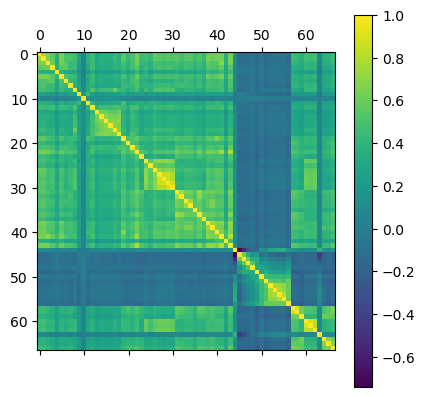

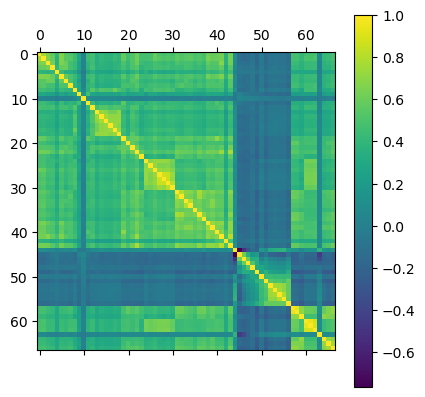

In [199]:
plt.matshow(pear_cor)
plt.colorbar()
plt.show()
plt.matshow(spear_cor)
plt.colorbar()
plt.show()

In [ ]:
plt.matshow(ken_cor)
plt.colorbar()
plt.show()


In [92]:
neg_col = [name for name, vals in ken_cor.items() if vals.sum() < 5]

In [93]:
ken_cor[neg_col]

,Q11,Q46,Q47_01,Q47_02,Q47_03,Q47_04,Q47_05,Q47_06,Q47_07,Q47_08,Q47_09,Q47_10,Q47_11,Q54
Q1,0.025833,-0.120097,-0.138212,-0.129690,-0.073327,-0.160319,-0.034332,-0.131947,-0.076765,-0.063907,-0.077274,-0.073784,-0.120584,0.064179
Q2,0.029579,-0.111998,-0.134888,-0.129424,-0.071858,-0.157621,-0.037774,-0.133252,-0.081881,-0.066682,-0.080272,-0.076536,-0.123037,0.069137
Q3,0.023300,-0.087541,-0.111543,-0.106494,-0.065026,-0.151413,-0.044244,-0.124671,-0.082709,-0.070462,-0.080427,-0.075975,-0.116169,0.041511
Q4,0.022781,-0.059547,-0.076510,-0.082423,-0.057620,-0.132991,-0.036736,-0.112792,-0.066794,-0.059344,-0.069536,-0.066424,-0.111131,0.015907
Q5,0.020534,-0.028065,-0.032852,-0.047307,-0.041066,-0.079309,-0.039998,-0.082232,-0.046433,-0.037686,-0.050520,-0.058613,-0.078275,0.001997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q53,0.043440,-0.166570,-0.176888,-0.158076,-0.082227,-0.183504,-0.016210,-0.129901,-0.060655,-0.048630,-0.056173,-0.049420,-0.110966,0.087914
Q54,0.037073,-0.419328,-0.343556,-0.197636,-0.079846,-0.115378,0.063455,0.000648,0.052674,0.081935,0.090956,0.102161,0.034682,1.000000
Q55,0.017854,-0.113794,-0.132708,-0.129416,-0.103261,-0.214163,-0.083883,-0.181887,-0.098544,-0.080835,-0.096624,-0.086630,-0.170909,0.047734
Q56,0.021059,-0.143479,-0.151476,-0.138850,-0.092028,-0.215007,-0.062284,-0.180768,-0.108117,-0.081798,-0.103232,-0.096678,-0.167926,0.062568


In [200]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer


In [19]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num)
chi_square_value, p_value


(13264843.857732788, 0.0)

In [21]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num)


In [22]:
kmo_model

0.9776649414273321

In [24]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df_num)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev


array([25.21359915,  4.98146901,  3.42325219,  3.06549709,  2.77062259,
        2.01550843,  1.22317191,  1.14206283,  1.04598084,  0.93094273,
        0.85468232,  0.80676641,  0.77007298,  0.7275763 ,  0.6999716 ,
        0.68037262,  0.64707998,  0.62209267,  0.59545312,  0.57731745,
        0.55482038,  0.54565279,  0.52008504,  0.5141737 ,  0.50136864,
        0.4738685 ,  0.46370149,  0.45381875,  0.43843547,  0.43295597,
        0.41582428,  0.40207296,  0.39790045,  0.39444265,  0.38366001,
        0.36666982,  0.35509196,  0.33118038,  0.32649245,  0.31417034,
        0.31185768,  0.30382211,  0.2916254 ,  0.27119554,  0.26592326,
        0.26199643,  0.25228971,  0.24714811,  0.23834688,  0.2347994 ,
        0.23394126,  0.22675225,  0.2236018 ,  0.22330791,  0.22120266,
        0.21305273,  0.19574736,  0.19142243,  0.18430823,  0.18179268,
        0.17684253,  0.14841913,  0.14536533,  0.12597064,  0.11030369,
        0.07232736,  0.06675923])

In [30]:
factors = [i for i in ev if i > 1]
factors

[25.213599147435133,
 4.981469014690881,
 3.4232521859326845,
 3.0654970899974416,
 2.7706225917017715,
 2.015508431475061,
 1.223171912258254,
 1.1420628285194587,
 1.0459808437497873]

In [56]:
fa = FactorAnalyzer(n_factors=len(factors))
fa.fit(df_num)


FactorAnalyzer(n_factors=9, rotation_kwargs={})

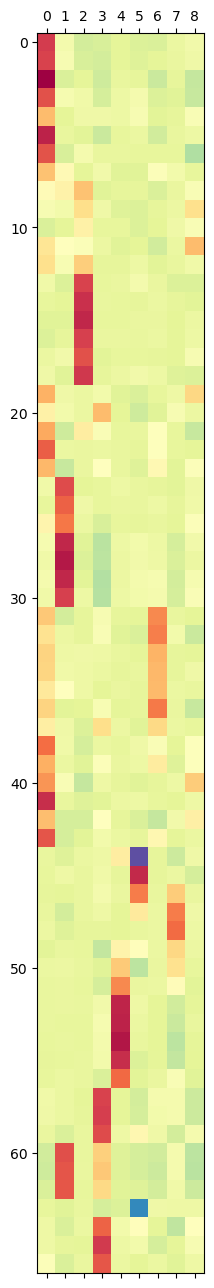

In [57]:
plt.matshow(fa.loadings_,cmap='Spectral_r')
plt.show()

In [58]:
fa.loadings_[:,7].max()

0.6653123497264525

In [59]:
fa.get_factor_variance()


(array([9.57498988, 6.63764037, 4.81288915, 4.73345898, 4.40459161,
        2.24226145, 2.17099434, 1.40145873, 0.98978947]),
 array([0.1429103 , 0.09906926, 0.07183417, 0.07064864, 0.06574017,
        0.03346659, 0.0324029 , 0.02091729, 0.01477298]),
 array([0.1429103 , 0.24197956, 0.31381372, 0.38446236, 0.45020254,
        0.48366913, 0.51607203, 0.53698932, 0.5517623 ]))

Random Forest Models


In [233]:
df_ca['leaveYN']=0
df_ca.loc[df_ca.DLEAVING =='B', 'leaveYN']=1
df_ca.loc[df_ca.DLEAVING =='C', 'leaveYN']=2
df_ca.loc[df_ca.DLEAVING =='D', 'leaveYN']=3

In [234]:
df_rf = df_num.copy()

In [301]:
df_rf['DRNO']=0
df_rf.loc[df_ca.DRNO =='B', 'DRNO']=1
df_rf.loc[df_ca.DRNO =='C', 'DRNO']=2
df_rf.loc[df_ca.DRNO =='D', 'DRNO']=3
df_rf.DRNO=df_rf.DRNO.astype('float')

In [302]:
df_rf['DHISP']=0
df_rf.loc[df_ca.DHISP =='B', 'DHISP']=1
df_rf.DHISP=df_rf.DHISP.astype('float')

In [303]:
df_rf['DDIS']=0
df_rf.loc[df_ca.DDIS =='B', 'DDIS']=1
df_rf.DDIS=df_rf.DDIS.astype('float')

In [304]:
df_rf['DAGEGRP']=0
df_rf.loc[df_ca.DAGEGRP =='B', 'DAGEGRP']=1
df_rf.DAGEGRP=df_rf.DAGEGRP.astype('float')

In [305]:
df_rf['DSUPER']=0
df_rf.loc[df_ca.DSUPER =='B', 'DSUPER']=1
df_rf.DSUPER=df_rf.DSUPER.astype('float')

In [306]:
df_rf['DFEDTEN']=0
df_rf.loc[df_ca.DFEDTEN =='B', 'DFEDTEN']=1
df_rf.loc[df_ca.DFEDTEN =='C', 'DFEDTEN']=2
df_rf.DFEDTEN=df_rf.DFEDTEN.astype('float')

In [307]:
df_rf['DSEX']=0
df_rf.loc[df_ca.DSEX =='B', 'DSEX']=1
df_rf.DSEX=df_rf.DSEX.astype('float')

In [308]:
df_rf['DMIL']=0
df_rf.loc[df_ca.DMIL =='B', 'DMIL']=1
df_rf.DMIL = df_rf.DMIL.astype('float')

In [309]:
df_rf.DMIL.value_counts()

1.0    166359
0.0     71760
Name: DMIL, dtype: int64

In [385]:
df_ca.agency.value_counts()

AR    29242
HS    20515
NV    17032
AG    16677
HE    15904
DD    13984
TR    12710
DJ    12246
IN    11523
AF    10901
SZ     9051
CM     7981
ST     7495
TD     6996
XX     6939
DN     6874
DL     5701
GS     5574
EP     5520
HU     3590
ED     1825
NU     1543
AM     1305
SB     1134
NQ     1050
OM      999
DR      925
NF      771
CU      768
EE      755
IB      589
Name: agency, dtype: int64

In [358]:
X = df_rf.loc[df_ca.agency == 'AG' ].copy()
y = df_ca.loc[df_ca.agency == 'AG' ].leaveYN

In [382]:
accuracy_list = []
for agen in df_ca.agency.value_counts().keys():
    X = df_rf.loc[df_ca.agency == agen ].copy()
    y = df_ca.loc[df_ca.agency == agen ].leaveYN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
    rf_model = RandomForestClassifier(n_estimators=50, max_features=9 , random_state=20)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    

In [384]:
accuracy_by_agency = pd.DataFrame(accuracy_list, df_ca.agency.value_counts().keys())
accuracy_by_agency

,0
AR,0.650256
HS,0.663255
NV,0.615610
AG,0.717626
HE,0.752986
DD,0.660472
TR,0.740362
DJ,0.707755
IN,0.715525
AF,0.582035


In [360]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [361]:
X_train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q56,Q57,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL
33816,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
35822,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
35485,3.0,3.0,4.0,4.0,2.0,4.0,4.0,0.0,5.0,2.0,...,4.0,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
36097,4.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,4.0,0.0,...,4.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
33328,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,...,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [362]:
%%time
rf_model = RandomForestClassifier(n_estimators=50, max_features=9 , random_state=20)
rf_model.fit(X_train, y_train)


CPU times: user 1.39 s, sys: 15.9 ms, total: 1.41 s
Wall time: 1.42 s


RandomForestClassifier(max_features=9, n_estimators=50, random_state=20)

In [363]:
y_pred = rf_model.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [364]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7176258992805755

In [317]:
from sklearn.model_selection import GridSearchCV

SyntaxError: illegal target for annotation (372734035.py, line 1)

In [119]:
%%time
n_estimators = [50, 100, 200, 400]
max_depth = [3, 6, 12]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4] 

paramF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
forest = RandomForestClassifier(max_features=9 , random_state=20)

gridF = GridSearchCV(forest, paramF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
CPU times: user 33.8 s, sys: 932 ms, total: 34.8 s
Wall time: 33min 33s


In [263]:
%%time
n_estimators = [50]
max_depth = range(1,13)

paramF = dict(n_estimators = n_estimators, max_depth = max_depth)
forest = RandomForestClassifier(max_features=9 , random_state=20)

gridF = GridSearchCV(forest, paramF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
CPU times: user 14.1 s, sys: 406 ms, total: 14.5 s
Wall time: 1min 33s


In [264]:
bestF.best_params_

{'max_depth': 12, 'n_estimators': 50}

In [265]:
forestBest = RandomForestClassifier(max_depth= 12,
 n_estimators= 50, max_features=9 , random_state=20)
forestBest.fit(X_train, y_train)



RandomForestClassifier(max_depth=12, max_features=9, n_estimators=50,
                       random_state=20)

In [266]:
y_pred = forestBest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 2, 0])

In [267]:
accuracy_score(y_test, y_pred)

0.6949437258525113

In [139]:
forestBest.feature_importances_

array([0.03150759, 0.0154561 , 0.05528345, 0.00698839, 0.00621544,
       0.05319288, 0.00431751, 0.0070794 , 0.00419291, 0.00503466,
       0.00371054, 0.00478985, 0.00430345, 0.00301118, 0.00296468,
       0.00316275, 0.00349858, 0.00391608, 0.00330463, 0.00677508,
       0.00486712, 0.00513846, 0.11389369, 0.02425735, 0.0049608 ,
       0.00382374, 0.00796751, 0.00503345, 0.00391408, 0.01020235,
       0.00739728, 0.02155765, 0.00907669, 0.0082183 , 0.00489109,
       0.00991861, 0.01663536, 0.00772185, 0.034308  , 0.01468458,
       0.02583525, 0.19277731, 0.02338231, 0.11963373, 0.00556037,
       0.00492958, 0.00327442, 0.00339316, 0.00290091, 0.00329891,
       0.00321077, 0.00290526, 0.00285559, 0.00244871, 0.00277323,
       0.00321521, 0.00300519, 0.00467095, 0.00504094, 0.0049431 ,
       0.00343889, 0.00357138, 0.0046368 , 0.00300374, 0.00470501,
       0.00580674, 0.00760942])

7